In [27]:
pip install meteostat

Note: you may need to restart the kernel to use updated packages.


In [53]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Daily,Point
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px


start = datetime(2013, 1, 1)
end = datetime.now()
#coordinates,elevation of Pune
pune= Point(18.5204,73.8567,560)

data = Daily(pune, start, end)
data = data.fetch()

df = pd.DataFrame(data)
df.to_csv("2022data.csv")


In [29]:
weather=df[["tmax","tmin","tavg","prcp","wdir","wspd","pres"]]
weather


,tmax,tmin,tavg,prcp,wdir,wspd,pres
time,,,,,,,
2013-01-01,32.6,NaN,24.5,NaN,NaN,NaN,NaN
2013-01-02,32.8,16.1,23.1,NaN,NaN,NaN,NaN
2013-01-03,32.2,14.4,21.8,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,20.3,NaN,NaN,NaN,NaN
2013-01-05,30.2,7.6,19.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-02-14,32.2,14.6,23.0,0.0,71.0,9.7,1015.6
2023-02-15,32.9,16.3,24.1,0.0,85.0,10.7,1013.9
2023-02-16,33.8,17.1,24.5,0.0,76.0,13.0,1014.2


In [30]:
weather.describe()

,tmax,tmin,tavg,prcp,wdir,wspd,pres
count,1848.000000,3058.000000,3699.000000,1716.000000,776.000000,776.000000,776.000000
mean,31.533279,18.553139,24.689159,4.669347,205.967784,7.171521,1009.959149
std,3.703073,4.295006,3.311278,11.784262,108.156757,3.466894,3.688758
min,18.900000,5.100000,14.700000,0.000000,0.000000,2.200000,999.100000
25%,28.900000,15.300000,22.800000,0.000000,73.750000,4.500000,1007.300000
50%,30.800000,20.000000,24.500000,0.300000,260.000000,6.100000,1009.800000
75%,34.000000,21.900000,26.700000,3.725000,282.000000,9.300000,1013.000000
max,41.300000,26.400000,35.100000,112.000000,359.000000,20.500000,1018.500000


In [31]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3701 entries, 2013-01-01 to 2023-02-18
Freq: D
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmax    1848 non-null   float64
 1   tmin    3058 non-null   float64
 2   tavg    3699 non-null   float64
 3   prcp    1716 non-null   float64
 4   wdir    776 non-null    float64
 5   wspd    776 non-null    float64
 6   pres    776 non-null    float64
dtypes: float64(7)
memory usage: 231.3 KB


In [32]:
#Renamed the columns
weather.columns=["Max_Temp","Min_Temp","Avg_Temp","Prcp","Wnd_Dir","Wind_Speed","Pressure"]
weather

,Max_Temp,Min_Temp,Avg_Temp,Prcp,Wnd_Dir,Wind_Speed,Pressure
time,,,,,,,
2013-01-01,32.6,NaN,24.5,NaN,NaN,NaN,NaN
2013-01-02,32.8,16.1,23.1,NaN,NaN,NaN,NaN
2013-01-03,32.2,14.4,21.8,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,20.3,NaN,NaN,NaN,NaN
2013-01-05,30.2,7.6,19.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-02-14,32.2,14.6,23.0,0.0,71.0,9.7,1015.6
2023-02-15,32.9,16.3,24.1,0.0,85.0,10.7,1013.9
2023-02-16,33.8,17.1,24.5,0.0,76.0,13.0,1014.2


In [33]:
#Calculated the null values
weather.apply(pd.isnull).sum()/weather.shape[0]


Max_Temp      0.500675
Min_Temp      0.173737
Avg_Temp      0.000540
Prcp          0.536342
Wnd_Dir       0.790327
Wind_Speed    0.790327
Pressure      0.790327
dtype: float64

In [34]:
weather=weather.fillna(weather.mean())
weather

,Max_Temp,Min_Temp,Avg_Temp,Prcp,Wnd_Dir,Wind_Speed,Pressure
time,,,,,,,
2013-01-01,32.600000,18.553139,24.5,4.669347,205.967784,7.171521,1009.959149
2013-01-02,32.800000,16.100000,23.1,4.669347,205.967784,7.171521,1009.959149
2013-01-03,32.200000,14.400000,21.8,4.669347,205.967784,7.171521,1009.959149
2013-01-04,31.533279,18.553139,20.3,4.669347,205.967784,7.171521,1009.959149
2013-01-05,30.200000,7.600000,19.1,4.669347,205.967784,7.171521,1009.959149
...,...,...,...,...,...,...,...
2023-02-14,32.200000,14.600000,23.0,0.000000,71.000000,9.700000,1015.600000
2023-02-15,32.900000,16.300000,24.1,0.000000,85.000000,10.700000,1013.900000
2023-02-16,33.800000,17.100000,24.5,0.000000,76.000000,13.000000,1014.200000


In [35]:
weather.apply(pd.isnull).sum()/weather.shape[0]

Max_Temp      0.0
Min_Temp      0.0
Avg_Temp      0.0
Prcp          0.0
Wnd_Dir       0.0
Wind_Speed    0.0
Pressure      0.0
dtype: float64

In [36]:
weather = weather.rename_axis('date').reset_index()
print(weather)

           date   Max_Temp   Min_Temp  Avg_Temp      Prcp     Wnd_Dir  \
0    2013-01-01  32.600000  18.553139      24.5  4.669347  205.967784   
1    2013-01-02  32.800000  16.100000      23.1  4.669347  205.967784   
2    2013-01-03  32.200000  14.400000      21.8  4.669347  205.967784   
3    2013-01-04  31.533279  18.553139      20.3  4.669347  205.967784   
4    2013-01-05  30.200000   7.600000      19.1  4.669347  205.967784   
...         ...        ...        ...       ...       ...         ...   
3696 2023-02-14  32.200000  14.600000      23.0  0.000000   71.000000   
3697 2023-02-15  32.900000  16.300000      24.1  0.000000   85.000000   
3698 2023-02-16  33.800000  17.100000      24.5  0.000000   76.000000   
3699 2023-02-17  34.100000  17.400000      24.8  0.000000   82.000000   
3700 2023-02-18  33.600000  16.500000      24.6  0.000000   90.000000   

      Wind_Speed     Pressure  
0       7.171521  1009.959149  
1       7.171521  1009.959149  
2       7.171521  1009.9591

<AxesSubplot:>

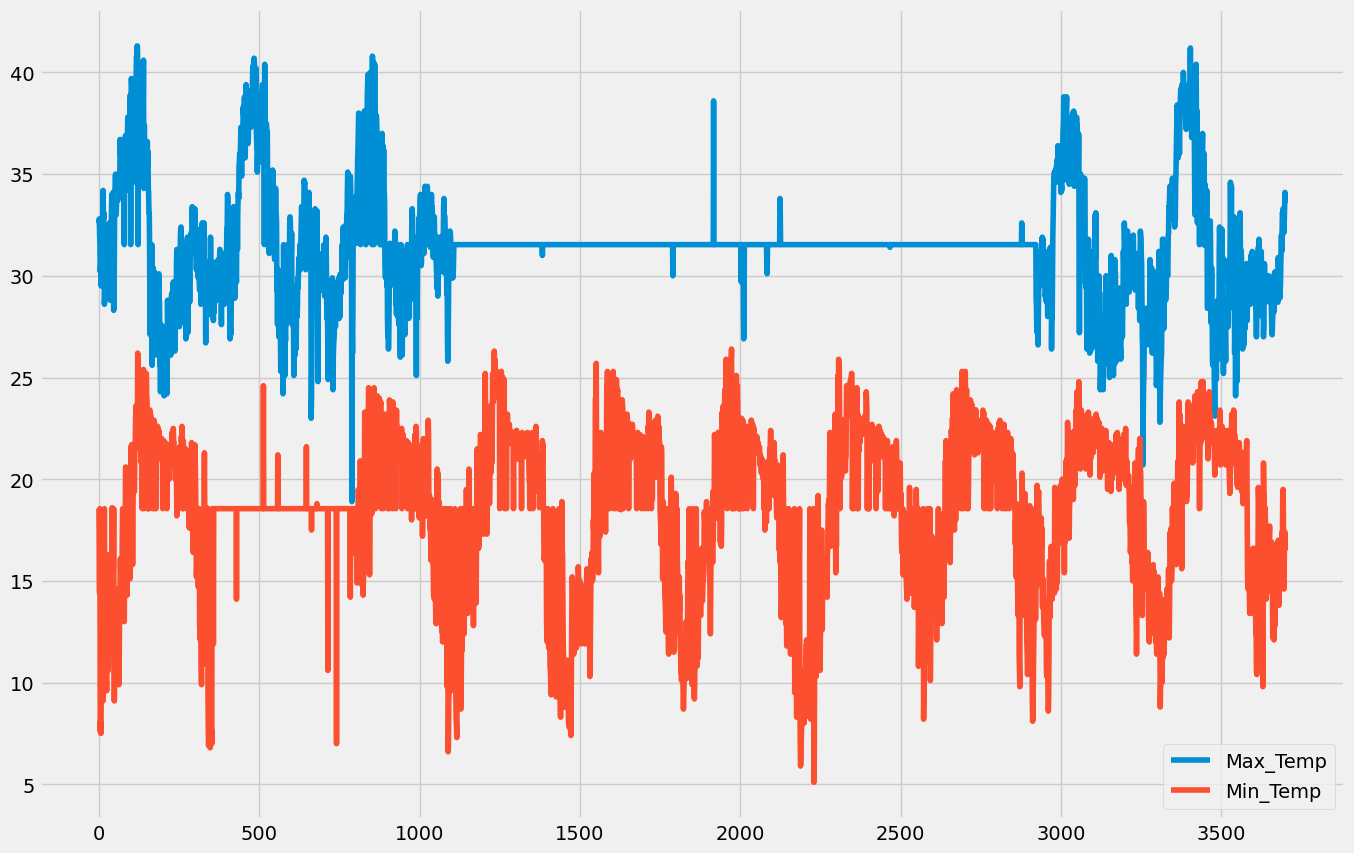

In [37]:
weather[["Max_Temp","Min_Temp"]].plot(figsize=(15,10))

In [38]:
#Set the target temperature to the max temprature of next day
weather["target"]=weather.shift(-1)["Max_Temp"]

In [39]:
weather

,date,Max_Temp,Min_Temp,Avg_Temp,Prcp,Wnd_Dir,Wind_Speed,Pressure,target
0,2013-01-01,32.600000,18.553139,24.5,4.669347,205.967784,7.171521,1009.959149,32.800000
1,2013-01-02,32.800000,16.100000,23.1,4.669347,205.967784,7.171521,1009.959149,32.200000
2,2013-01-03,32.200000,14.400000,21.8,4.669347,205.967784,7.171521,1009.959149,31.533279
3,2013-01-04,31.533279,18.553139,20.3,4.669347,205.967784,7.171521,1009.959149,30.200000
4,2013-01-05,30.200000,7.600000,19.1,4.669347,205.967784,7.171521,1009.959149,30.500000
...,...,...,...,...,...,...,...,...,...
3696,2023-02-14,32.200000,14.600000,23.0,0.000000,71.000000,9.700000,1015.600000,32.900000
3697,2023-02-15,32.900000,16.300000,24.1,0.000000,85.000000,10.700000,1013.900000,33.800000
3698,2023-02-16,33.800000,17.100000,24.5,0.000000,76.000000,13.000000,1014.200000,34.100000
3699,2023-02-17,34.100000,17.400000,24.8,0.000000,82.000000,12.100000,1014.400000,33.600000


In [40]:
weather=weather.iloc[:-1,:].copy()

In [41]:
weather

,date,Max_Temp,Min_Temp,Avg_Temp,Prcp,Wnd_Dir,Wind_Speed,Pressure,target
0,2013-01-01,32.600000,18.553139,24.5,4.669347,205.967784,7.171521,1009.959149,32.800000
1,2013-01-02,32.800000,16.100000,23.1,4.669347,205.967784,7.171521,1009.959149,32.200000
2,2013-01-03,32.200000,14.400000,21.8,4.669347,205.967784,7.171521,1009.959149,31.533279
3,2013-01-04,31.533279,18.553139,20.3,4.669347,205.967784,7.171521,1009.959149,30.200000
4,2013-01-05,30.200000,7.600000,19.1,4.669347,205.967784,7.171521,1009.959149,30.500000
...,...,...,...,...,...,...,...,...,...
3695,2023-02-13,32.100000,15.300000,23.3,0.000000,84.000000,11.100000,1016.000000,32.200000
3696,2023-02-14,32.200000,14.600000,23.0,0.000000,71.000000,9.700000,1015.600000,32.900000
3697,2023-02-15,32.900000,16.300000,24.1,0.000000,85.000000,10.700000,1013.900000,33.800000
3698,2023-02-16,33.800000,17.100000,24.5,0.000000,76.000000,13.000000,1014.200000,34.100000


In [42]:
weather['date']=pd.to_datetime(weather['date'],format='%y-%m-%d')
weather['year']=weather['date'].dt.year
weather['month']=weather['date'].dt.month
weather

,date,Max_Temp,Min_Temp,Avg_Temp,Prcp,Wnd_Dir,Wind_Speed,Pressure,target,year,month
0,2013-01-01,32.600000,18.553139,24.5,4.669347,205.967784,7.171521,1009.959149,32.800000,2013,1
1,2013-01-02,32.800000,16.100000,23.1,4.669347,205.967784,7.171521,1009.959149,32.200000,2013,1
2,2013-01-03,32.200000,14.400000,21.8,4.669347,205.967784,7.171521,1009.959149,31.533279,2013,1
3,2013-01-04,31.533279,18.553139,20.3,4.669347,205.967784,7.171521,1009.959149,30.200000,2013,1
4,2013-01-05,30.200000,7.600000,19.1,4.669347,205.967784,7.171521,1009.959149,30.500000,2013,1
...,...,...,...,...,...,...,...,...,...,...,...
3695,2023-02-13,32.100000,15.300000,23.3,0.000000,84.000000,11.100000,1016.000000,32.200000,2023,2
3696,2023-02-14,32.200000,14.600000,23.0,0.000000,71.000000,9.700000,1015.600000,32.900000,2023,2
3697,2023-02-15,32.900000,16.300000,24.1,0.000000,85.000000,10.700000,1013.900000,33.800000,2023,2
3698,2023-02-16,33.800000,17.100000,24.5,0.000000,76.000000,13.000000,1014.200000,34.100000,2023,2


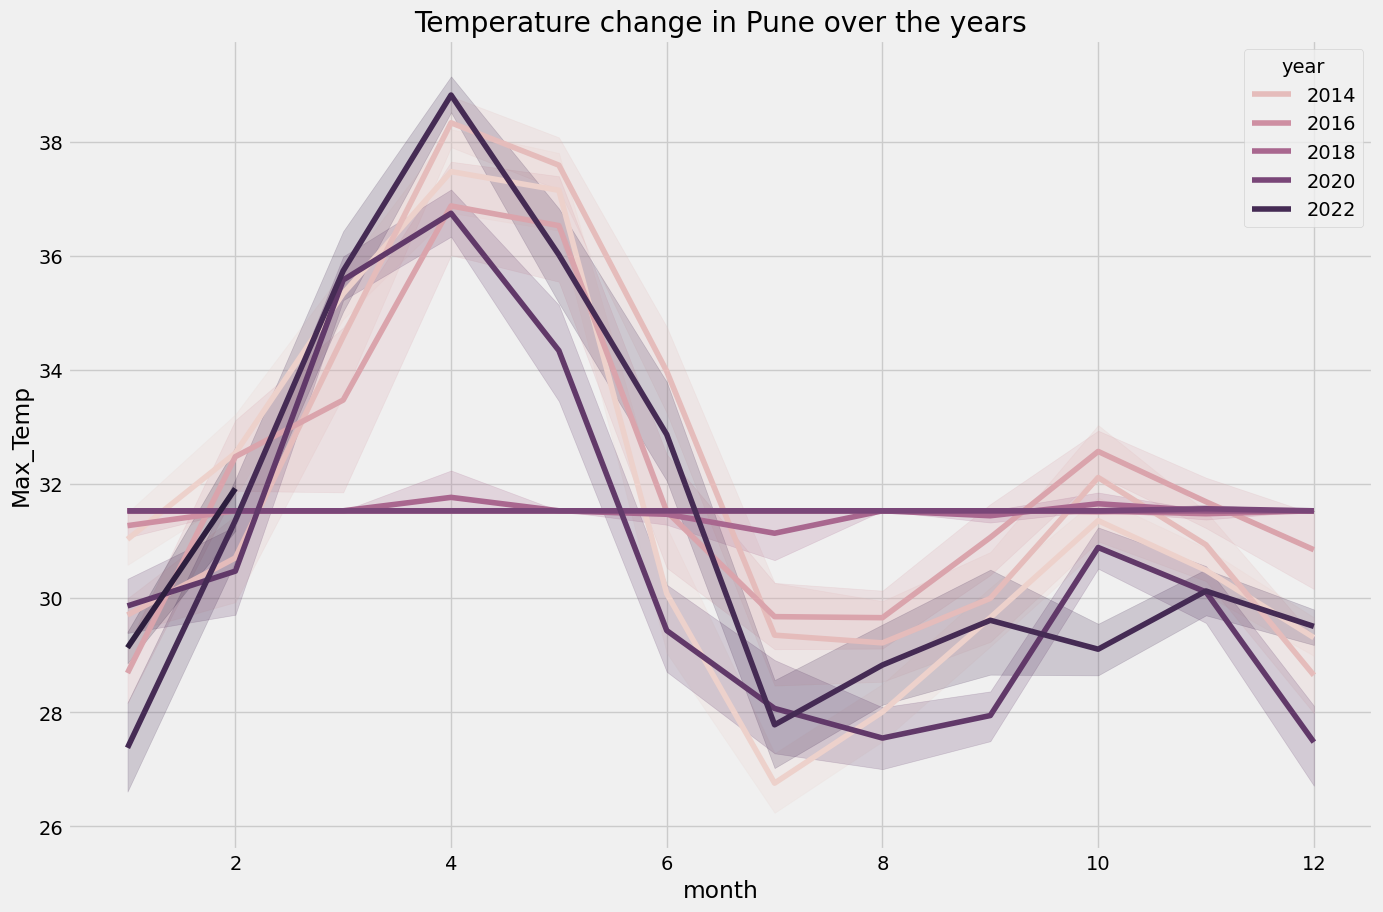

In [43]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.title("Temperature change in Pune over the years")
sns.lineplot(data=weather,x='month',y='Max_Temp',hue='year')
plt.show()

In [44]:
forecast_data = weather.rename(columns = {"date": "ds", 
                                       "Max_Temp": "y"})
print(forecast_data)

             ds          y   Min_Temp  Avg_Temp      Prcp     Wnd_Dir  \
0    2013-01-01  32.600000  18.553139      24.5  4.669347  205.967784   
1    2013-01-02  32.800000  16.100000      23.1  4.669347  205.967784   
2    2013-01-03  32.200000  14.400000      21.8  4.669347  205.967784   
3    2013-01-04  31.533279  18.553139      20.3  4.669347  205.967784   
4    2013-01-05  30.200000   7.600000      19.1  4.669347  205.967784   
...         ...        ...        ...       ...       ...         ...   
3695 2023-02-13  32.100000  15.300000      23.3  0.000000   84.000000   
3696 2023-02-14  32.200000  14.600000      23.0  0.000000   71.000000   
3697 2023-02-15  32.900000  16.300000      24.1  0.000000   85.000000   
3698 2023-02-16  33.800000  17.100000      24.5  0.000000   76.000000   
3699 2023-02-17  34.100000  17.400000      24.8  0.000000   82.000000   

      Wind_Speed     Pressure     target  year  month  
0       7.171521  1009.959149  32.800000  2013      1  
1       7.1

In [45]:

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)

plot_plotly(model, predictions)


17:18:10 - cmdstanpy - INFO - Chain [1] start processing
17:18:11 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
forecasts.tail()



AttributeError: 'str' object has no attribute 'shape'

In [47]:
print(predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

             ds       yhat  yhat_lower  yhat_upper
0    2013-01-01  31.746547   29.119239   34.301603
1    2013-01-02  31.757694   29.155103   34.152627
2    2013-01-03  31.702980   29.084362   34.285265
3    2013-01-04  31.686824   29.152961   34.386054
4    2013-01-05  31.661579   29.120521   34.378696
...         ...        ...         ...         ...
4060 2024-02-13  30.311230   27.671656   33.162816
4061 2024-02-14  30.372757   27.710489   33.038328
4062 2024-02-15  30.366127   27.924471   33.366455
4063 2024-02-16  30.396083   27.918323   33.265530
4064 2024-02-17  30.415335   28.126048   33.079415

[4065 rows x 4 columns]


In [64]:
df1 = pd.DataFrame(predictions)
df2 = df1[['ds','yhat']]
df2['ds'] = df2['ds'].astype(str)

/var/folders/2z/pqdn57496w1frtnvb6hbdyzr0000gn/T/ipykernel_13089/1548542537.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
def predict_tmax(d):
  #date = input("The data you want to forecast for : ")
  for i in range(len(df2)):
    if(d == df2['ds'][i]):
       # print("Max Temperature : " + 
              #str(df2['yhat'][i]))
              a= str(df2['yhat'][i])
              return a


AttributeError: 'datetime.datetime' object has no attribute 'shape'

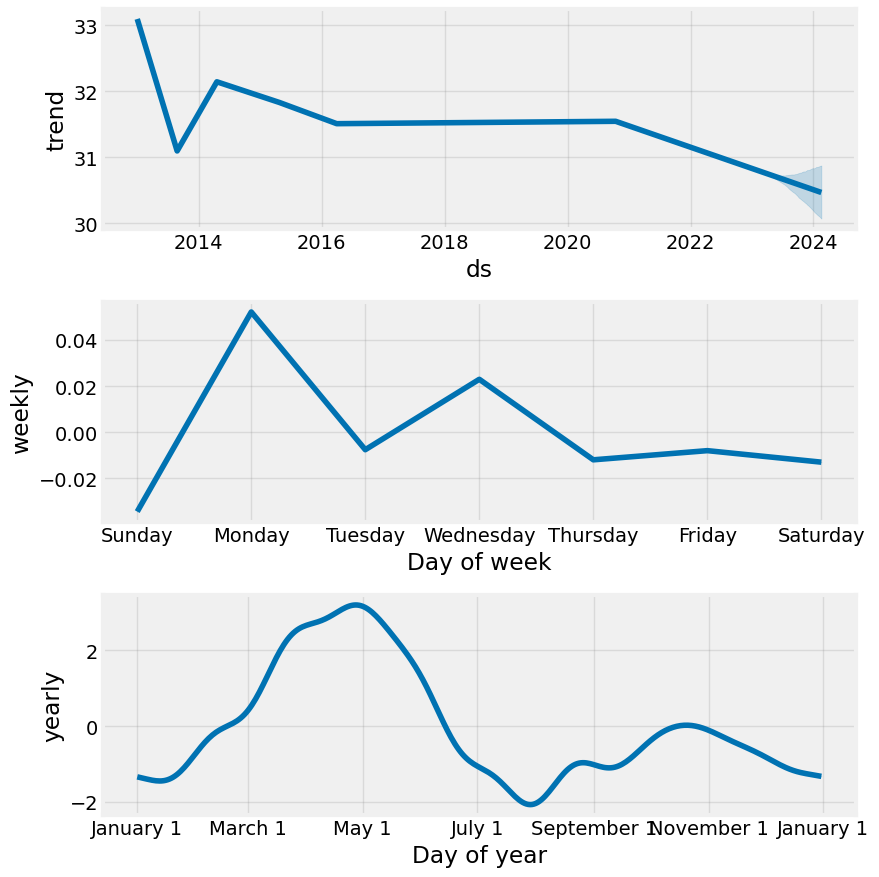

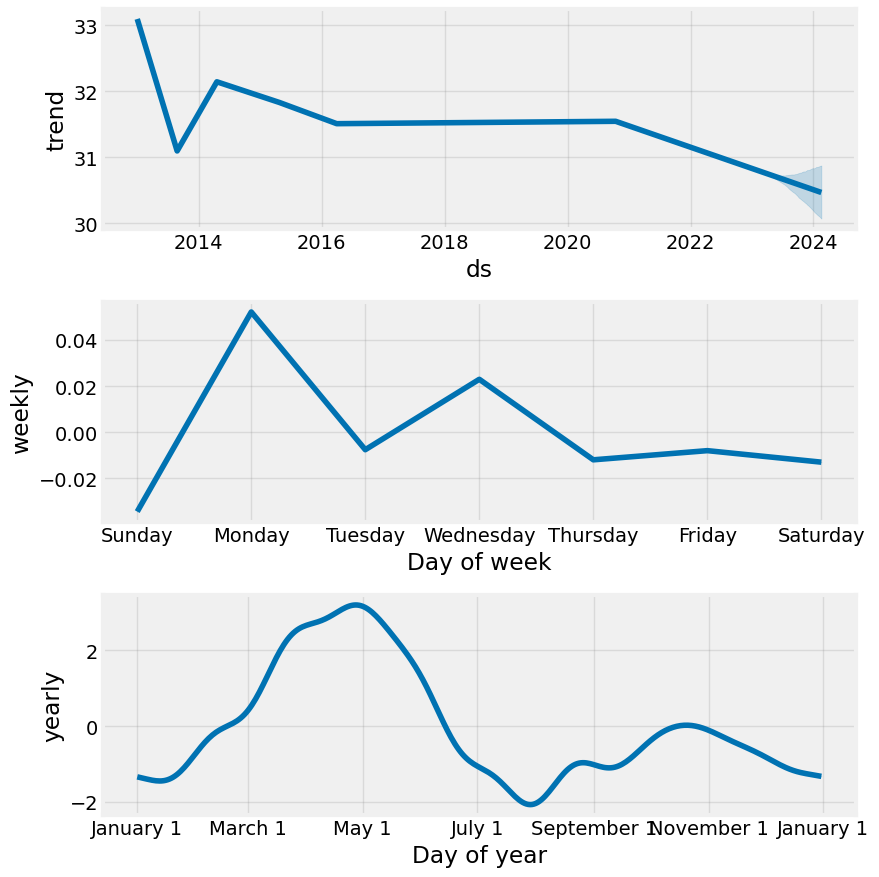

In [50]:
model.plot_components(predictions)

In [56]:
import pickle
pickle.dump(model,open('prop_tmax.pkl','wb'))


In [52]:
#def mse(predictions, actual_label="actual_val", pred_label="yhat"):
#   se = ((predictions[actual_label] - predictions[pred_label]) ** 2)
#  print(se.mean())
    
#mse(predictions)
#print(mse)   